In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from fbprophet import Prophet


//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
os.getcwd() 

'/Users/masanoritakahashi/Documents/aqi/modefieddata'

In [3]:
! ls

alipur_delhi.csv
conbind_modefieddata-ARIMA.ipynb
conbind_modefieddata-Prophet-Copy1.ipynb
conbind_modefieddata-Prophet.ipynb
conbind_modefieddata-単変量XGboost_予測値で予測.ipynb
conbind_modefieddata.ipynb
indirapuram_ghaziabad.csv
mduni_rohtak.csv
murthal_sonipat.csv
sector125_noida.csv
sector16a_faridabad.csv


In [4]:
files = glob.glob("/Users/masanoritakahashi/Documents/aqi/modefieddata/*.csv")

In [70]:
df_pm25=pd.DataFrame(columns=[""])
for file in files:
    df=pd.read_csv(file, usecols=[1])
    df_pm25=pd.concat([df_pm25, df], axis=1)
    
df_pm25=df_pm25.iloc[:,1:]

In [71]:
tmp_time=pd.date_range(start='2019-07-06 00:00', end='2019-10-04 8:00', freq='H').strftime('%Y-%m-%d %H:%M:%S')
df_tmp_time=pd.DataFrame(tmp_time, columns=["utc"])
df_pm25["utc"]=pd.to_datetime(df_tmp_time["utc"])

In [72]:
df_pm25=df_pm25[["utc", "alipur"]]

## 可視化

In [31]:
pd.plotting.register_matplotlib_converters()

In [79]:
values_alipur

utc
2019-07-06 00:00:00    56.00
2019-07-06 01:00:00    69.00
2019-07-06 02:00:00    69.00
2019-07-06 03:00:00    64.00
2019-07-06 04:00:00    56.00
                       ...  
2019-10-03 04:00:00    48.75
2019-10-03 05:00:00    46.50
2019-10-03 06:00:00    44.25
2019-10-03 07:00:00    42.00
2019-10-03 08:00:00    39.75
Name: alipur, Length: 2145, dtype: float64

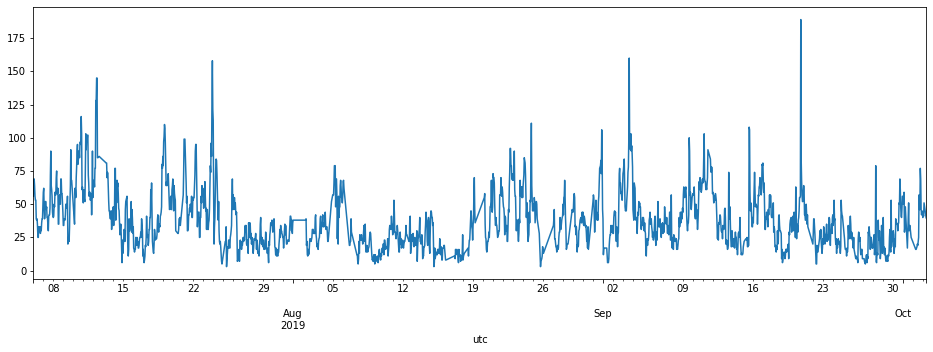

In [78]:
df_pm25["alipur"]=df_pm25["alipur"].interpolate('linear')
values_alipur = pd.Series(df_pm25["alipur"][:-24], dtype="float")
values_alipur.index= pd.to_datetime(df_pm25["utc"][:-24])
plt.figure(figsize=(16, 5))
values_alipur.plot()

## 　トレンド、季節性、残差

In [37]:
# 欠損があると扱えない
res = sm.tsa.seasonal_decompose(values_alipur)

In [36]:
original = values_alipur # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

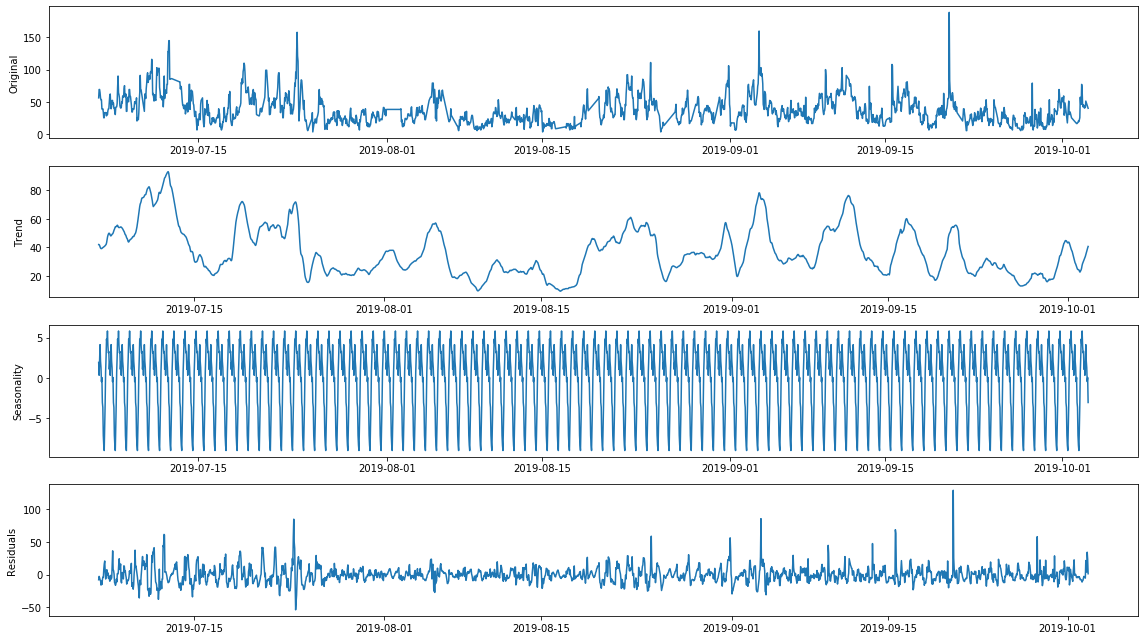

In [38]:
plt.figure(figsize=(16, 9)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

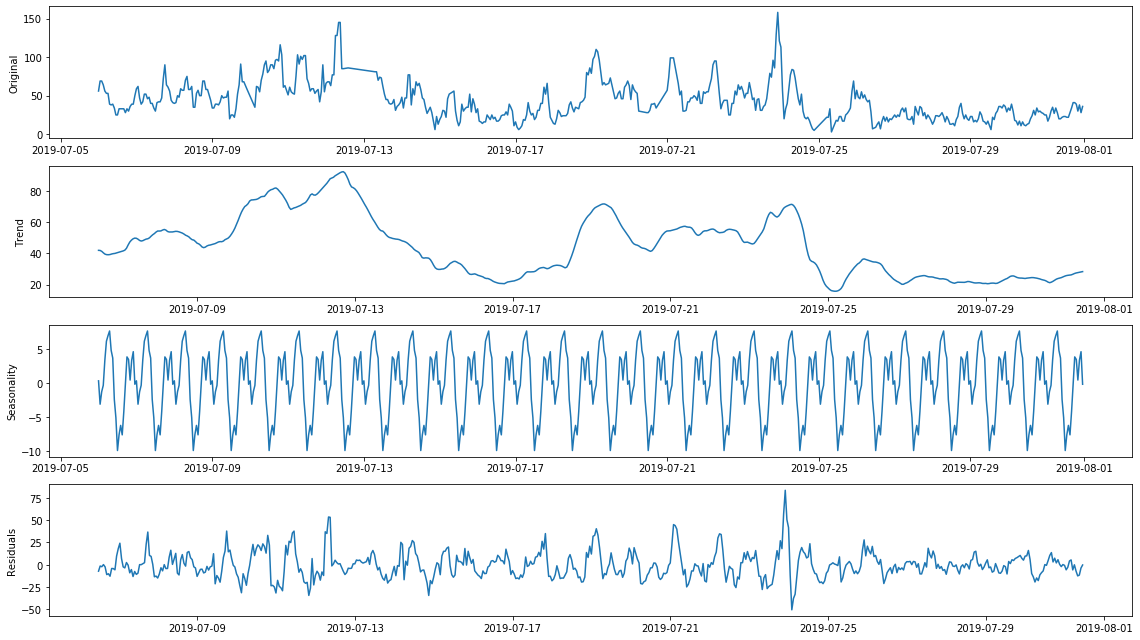

In [82]:
jul=values_alipur[:"2019-07-31"]
res = sm.tsa.seasonal_decompose(values_alipur)

jul_original = jul# オリジナルデータ
jul_trend = res.trend # トレンドデータ
jul_seasonal = res.seasonal # 季節性データ
jul_residual = res.resid # 残差データ

plt.figure(figsize=(16, 9)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(jul_original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(jul_trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(jul_seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(jul_residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

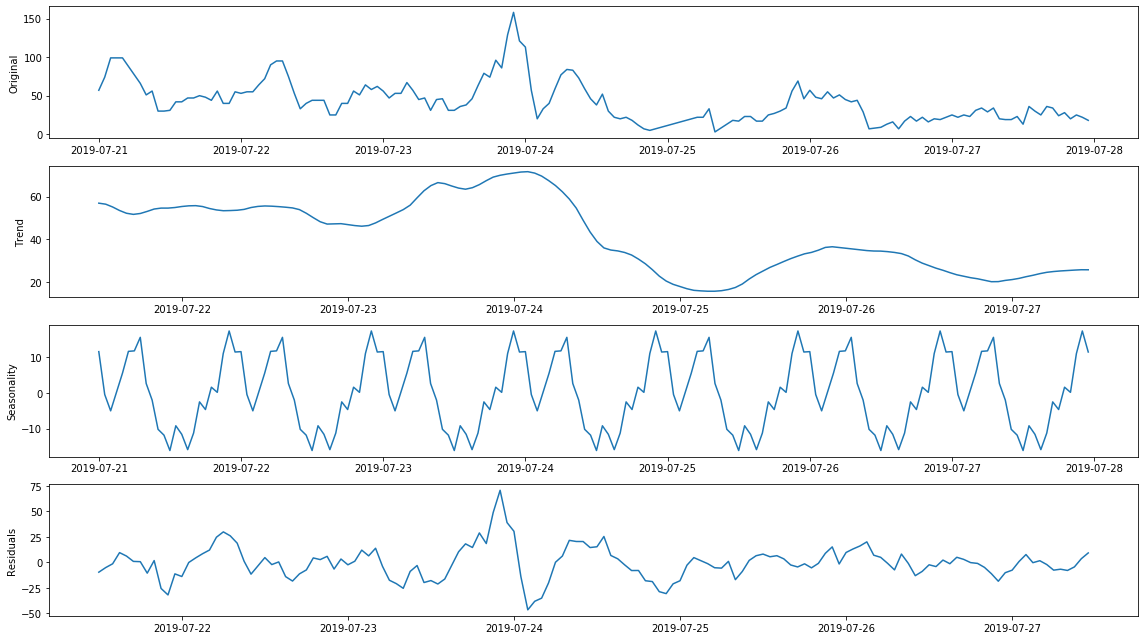

In [49]:
julweek=values_alipur["2019-07-21":"2019-07-27"]
res = sm.tsa.seasonal_decompose(julweek)

julweek_original = julweek# オリジナルデータ
julweek_trend = res.trend # トレンドデータ
julweek_seasonal = res.seasonal # 季節性データ
julweek_residual = res.resid # 残差データ

plt.figure(figsize=(16, 9)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(julweek_original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(julweek_trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(julweek_seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(julweek_residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

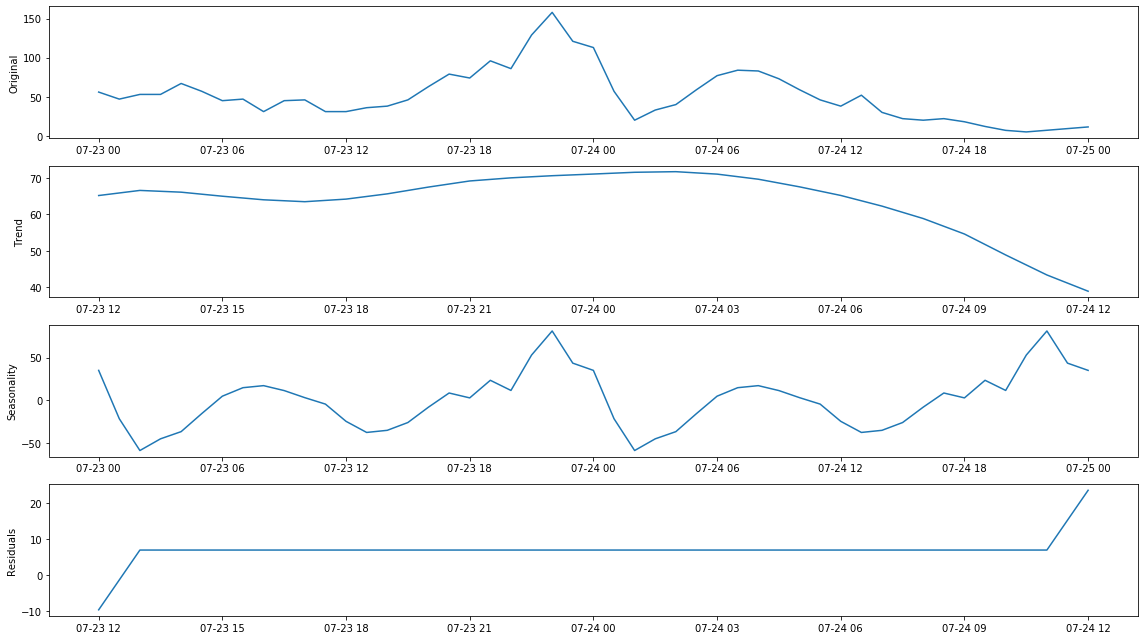

In [92]:
julweek=values_alipur["2019-07-23 00:00:00":"2019-07-25 00:00:00"]
res = sm.tsa.seasonal_decompose(julweek)

julweek_original = julweek# オリジナルデータ
julweek_trend = res.trend # トレンドデータ
julweek_seasonal = res.seasonal # 季節性データ
julweek_residual = res.resid # 残差データ

plt.figure(figsize=(16, 9)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(julweek_original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(julweek_trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(julweek_seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(julweek_residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

## 定常性の検定

・定常性の仮定
①どの時点tに対してもyの期待値が常にμを取るということを意味しています。期待値が一定
②時点tにおけるj次の自己共分散がγjという形で表現されています。時点tによらずj次の自己共分散が常に一定

・WHY定常性
定常性を仮定するとは、時系列データの期待値や自己共分散を一定とみなすことです。こうすることで時系列データの複雑な条件を無視することができる
定常性を満たさない時系列データを扱う場合、データの差分や対数をとるなどして定常性を満たすように処理を施すことがあります。

非定常過程→一般的な時系列データ(トレンドや季節性あり)

データの定常性が『定常過程』であることを前提にしたモデル

In [75]:
#ADF検定は拡張ディッキー-フラー検定（Augmented Dickey-Fuller test, ADF test）
#時系列のサンプルデータが、単位根過程（非定常過程）であるかどうかを調べたい時に利用

#単位根過程とういうのは非定常だけど、差分をとると（弱）定常になるようなデータだよ。
#ADF検定は帰無仮説『単位根過程（非定常過程）である』を棄却するこで、そのデータが定常過程とみなせるよ。

In [76]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(values_alipur, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(values_alipur, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(values_alipur, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(values_alipur, regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)

(-10.382664602654666, 5.795195912331747e-16, 26, 2117, {'1%': -4.376611905637056, '5%': -3.8351824545352002, '10%': -3.554989860377002}, 15850.449717478294)
(-10.381766909113463, 3.698754545570784e-16, 26, 2117, {'1%': -3.963052738956303, '5%': -3.4125658991159713, '10%': -3.1282722291130787}, 15848.53439569612)
(-10.38386021569585, 2.104751375201498e-18, 26, 2117, {'1%': -3.433442700457683, '5%': -2.8629062300113994, '10%': -2.567497315483069}, 15846.543143166487)
(-10.386416022700962, 1.4370271546460305e-18, 26, 2117, {'1%': -2.5667969264400097, '5%': -1.9411276251991825, '10%': -1.6166951423445255}, 15844.545266991627)


In [ ]:
#どの条件でもp-valueが高く帰無仮説を棄却できないから、定常とは言えないね。
#このあと、原型列に何らかの変換をして定常になる条件を確認していく流れ

## 自己回帰の確認

前期と今期がどれだけ似ているか、を表すのが「自己相関」です。
正の自己相関があれば、先月の乗客数が多ければ、今月も多いということがわかります。
負の自己相関であれば、その逆です。
ほかの日は無視して、特定の日のみとの自己相関が見たい」というニーズが生まれます。
これができるのが『偏自己相関』です。先ほどの例だと「一昨日と昨日が似ている」というのを無視して、純粋に「一昨日と今日の関係」を調べることができます。



In [56]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(values_alipur, nlags=40)
ts_acf

# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(values_alipur, nlags=40, method='ols')
ts_pacf

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.00000000e+00,  8.83131847e-01,  7.94150379e-02,  3.01679309e-02,
       -9.97131181e-03,  3.47825714e-02,  4.19286000e-02,  3.41855981e-02,
        5.09950152e-02,  1.88420048e-03,  5.58580759e-02,  4.37268242e-02,
        3.67896778e-02, -3.66808708e-02,  3.15234276e-02,  1.59676847e-02,
        2.06389936e-02,  1.94651893e-03,  5.84241498e-02,  4.37074939e-02,
        5.46444379e-02,  5.35839039e-02,  3.09227950e-02,  3.69164698e-03,
       -2.47006408e-02, -4.31819598e-02, -5.38420046e-02, -6.03146427e-02,
       -4.94361422e-02, -2.61436001e-02,  6.56697200e-03, -8.99931655e-04,
        1.08960360e-02,  2.68847220e-02,  1.03369576e-03,  4.61442222e-03,
        2.21852834e-02,  9.07520438e-03,  4.61959888e-03,  3.12801650e-02,
        1.74290838e-02])

横軸がラグ数で、縦軸が自己相関係数

95%信頼区間だよ。信頼区間の領域を超えてプロットされているデータは、統計的に有意差がある値

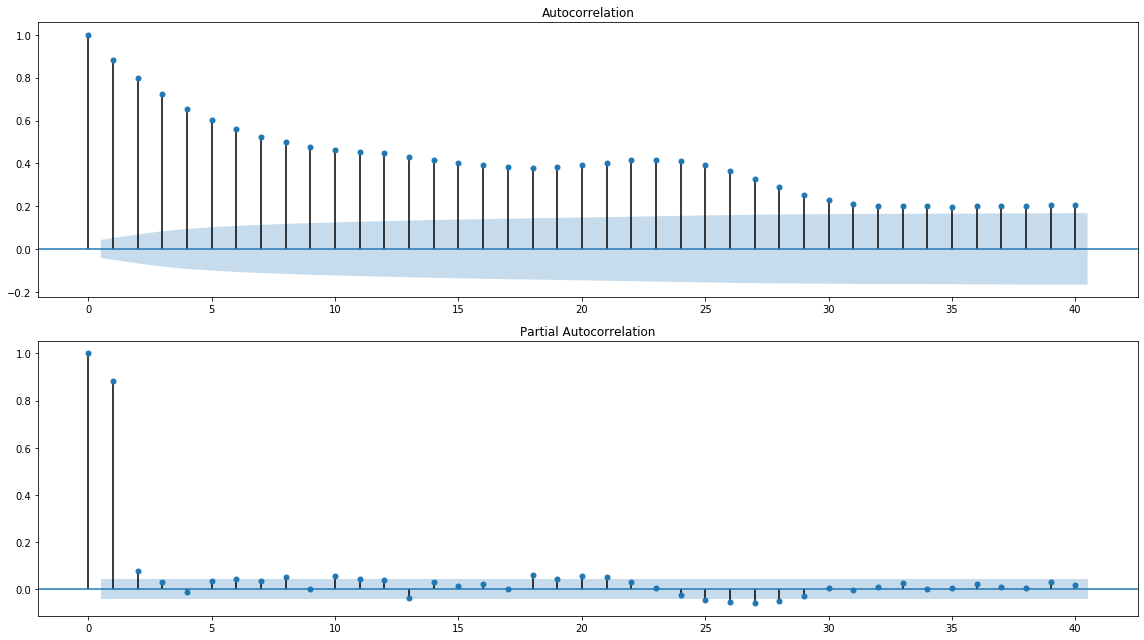

In [64]:
# 自己相関(ACF)のグラフ自動作成,コレログラム
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(values_alipur, lags=40, ax=ax1) #飛行機乗客数データ、ラグ40、グラフaxes

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(values_alipur, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [73]:
values_alipur_diff = values_alipur - values_alipur.shift() # 階差系列データの作成
values_alipur_diff = values_alipur_diff.dropna()

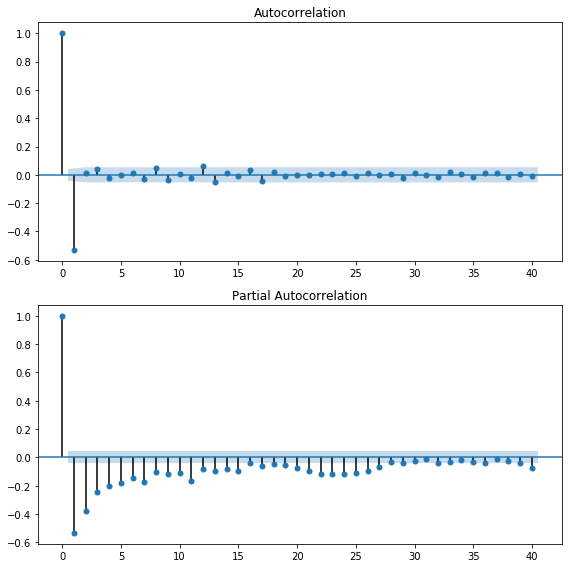

In [74]:
# 階差系列データでコレログラム作成
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(values_alipur_diff, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(values_alipur_diff, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

# 時系列モデルによる予測

In [96]:
# Prophet用DataFrameを生成
data_alipur = pd.DataFrame()
data_alipur['ds'] = values_alipur.index
data_alipur['y'] = values_alipur.values
#data_alipur["cap"]=5.5

# Prophetモデルの構築
#m = Prophet(growth='linear',weekly_seasonality=True, daily_seasonality=True)
m = Prophet(growth='linear')
m.add_seasonality(name='monthly', period=30.5, fourier_order=10) #フーリエ係数大きいほど変動にフィット
m.add_seasonality(name='weekly', period=7, fourier_order=50) #フーリエ係数大きいほど変動にフィット
m.add_seasonality(name='daily', period=24, fourier_order=500) #フーリエ係数大きいほど変動にフィット

# 学習()
m.fit(data_alipur)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet:Found custom seasonality named "daily", disabling built-in daily seasonality.


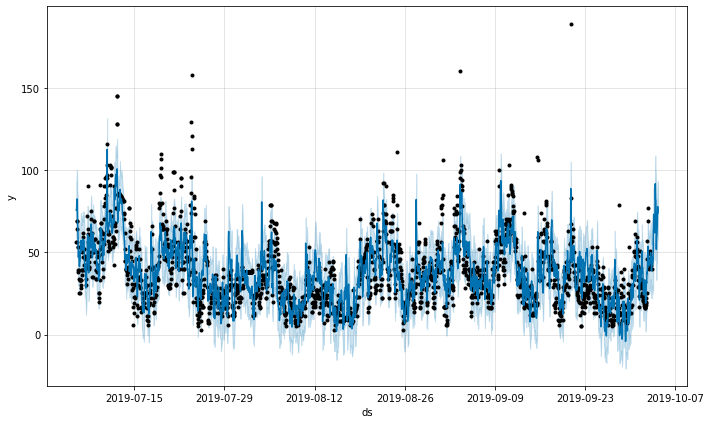

<Figure size 1152x648 with 0 Axes>

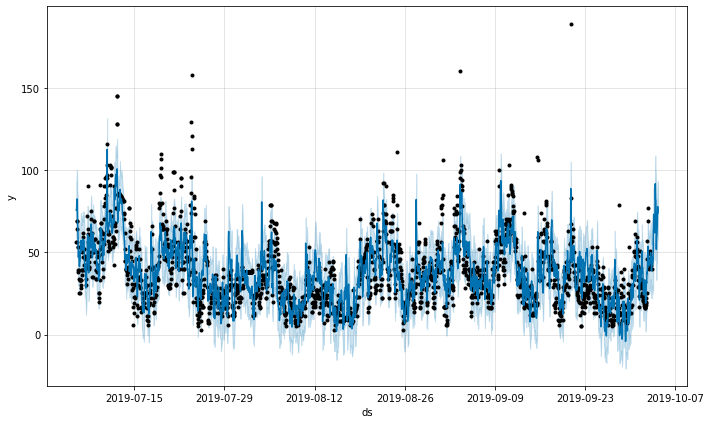

In [97]:
# 将来3日間を予測
future_alipur = m.make_future_dataframe(periods=24, freq="H")
#future_alipur["cap"]=5.5
forecast_alipur= m.predict(future_alipur)
plt.figure(figsize=(16,9))
m.plot(forecast_alipur)

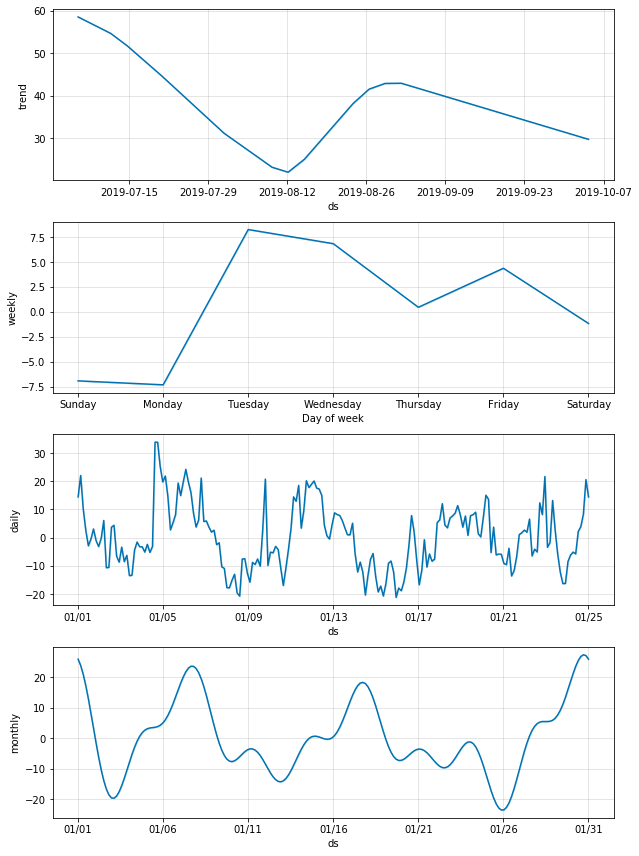

In [98]:
#forecast_alipur["yhat"]=np.exp(forecast_alipur["yhat"])

#m.plot(forecast_alipur)
fig = m.plot_components(forecast_alipur)

In [99]:


# MSE
from sklearn.metrics import mean_squared_error
#print('MSE : %.3f' % (mean_squared_error(values_alipur.values, np.exp(forecast_alipur)))) 
print('MSE : %.3f' % (mean_squared_error(values_alipur.values, forecast_alipur[:-24]["yhat"])))
# R^2
from sklearn.metrics import r2_score
#print('R^2  : %.3f' % (r2_score(np.exp(forecast_alipur), values_alipur.values ))) 
print('R^2  : %.3f' % (r2_score( values_alipur.values ,forecast_alipur[:-24]["yhat"]))) 

MSE : 173.486
R^2  : 0.634


In [100]:
len(values_alipur)

2145

In [101]:
len(forecast_alipur)

2169

In [102]:
df_pm25[["alipur", "utc"]][-24:]

,alipur,utc
2145,37.50,2019-10-03 09:00:00
2146,35.25,2019-10-03 10:00:00
2147,33.00,2019-10-03 11:00:00
2148,53.00,2019-10-03 12:00:00
2149,46.00,2019-10-03 13:00:00
2150,69.00,2019-10-03 14:00:00
2151,66.00,2019-10-03 15:00:00
2152,24.00,2019-10-03 16:00:00
2153,28.00,2019-10-03 17:00:00
2154,30.00,2019-10-03 18:00:00


In [103]:
forecast_alipur[-24:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2145,2019-10-03 09:00:00,30.120335,27.075512,60.261548,30.120335,30.120335,14.430910,14.430910,14.430910,-1.571680,...,17.653936,17.653936,17.653936,-1.651347,-1.651347,-1.651347,0.0,0.0,0.0,44.551245
2146,2019-10-03 10:00:00,30.103747,30.240697,63.993467,30.103747,30.103747,17.107831,17.107831,17.107831,-1.071181,...,18.378690,18.378690,18.378690,-0.199678,-0.199678,-0.199678,0.0,0.0,0.0,47.211577
2147,2019-10-03 11:00:00,30.087159,24.605761,59.898490,30.087159,30.087159,11.936181,11.936181,11.936181,-6.299273,...,19.099832,19.099832,19.099832,-0.864378,-0.864378,-0.864378,0.0,0.0,0.0,42.023339
2148,2019-10-03 12:00:00,30.070570,26.332643,59.721691,30.070570,30.070570,13.206409,13.206409,13.206409,-4.827790,...,19.813730,19.813730,19.813730,-1.779531,-1.779531,-1.779531,0.0,0.0,0.0,43.276980
2149,2019-10-03 13:00:00,30.053982,27.459374,61.033189,30.053982,30.053982,14.049667,14.049667,14.049667,-4.857340,...,20.516690,20.516690,20.516690,-1.609683,-1.609683,-1.609683,0.0,0.0,0.0,44.103649
2150,2019-10-03 14:00:00,30.037394,27.862392,62.060572,30.037394,30.037394,15.391142,15.391142,15.391142,-4.623346,...,21.204975,21.204975,21.204975,-1.190487,-1.190487,-1.190487,0.0,0.0,0.0,45.428536
2151,2019-10-03 15:00:00,30.020806,50.649298,84.162527,30.020806,30.020806,37.994784,37.994784,37.994784,16.628763,...,21.874829,21.874829,21.874829,-0.508807,-0.508807,-0.508807,0.0,0.0,0.0,68.015590
2152,2019-10-03 16:00:00,30.004218,55.625617,89.525494,30.004218,30.004218,43.056265,43.056265,43.056265,19.083575,...,22.522494,22.522494,22.522494,1.450196,1.450196,1.450196,0.0,0.0,0.0,73.060483
2153,2019-10-03 17:00:00,29.987630,51.157320,85.237004,29.987630,29.987630,39.037233,39.037233,39.037233,12.270865,...,23.144234,23.144234,23.144234,3.622134,3.622134,3.622134,0.0,0.0,0.0,69.024864
2154,2019-10-03 18:00:00,29.971042,49.636409,82.162032,29.971042,29.971042,36.493076,36.493076,36.493076,9.238654,...,23.736357,23.736357,23.736357,3.518065,3.518065,3.518065,0.0,0.0,0.0,66.464118


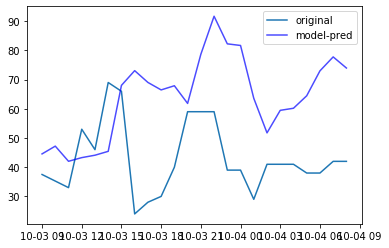

In [104]:
#plt.plot(df_pm25[["alipur", "utc"]][-72:], label="original")

plot_values_alipur = pd.Series(df_pm25["alipur"][-24:], dtype="float")
plot_values_alipur.index= pd.to_datetime(df_pm25["utc"][-24:])

plot_values_pred = pd.Series(forecast_alipur[-24:]["yhat"], dtype="float")
plot_values_pred.index= pd.to_datetime(forecast_alipur[-24:]["ds"])



plt.plot(plot_values_alipur, label="original")
plt.plot(plot_values_pred , c="b", label="model-pred", alpha=0.7)
plt.legend(loc='best')

In [78]:
original =values_alipur
original[(original>=0) & (original<=50)]=-1
original[(original>50) & (original<=100)]=-2
original[(original>10) & (original<=200)]=-3
original[(original>200) & (original<=300)]=-4
original[(original>300) & (original<=400)]=-5
original[(original>400) & (original<=500)]=-6



original[original==-1]="Good"
original[original==-2]="Satisfactory"
original[original==-3]="Moderately polluted"
original[original==-4]="Poor"
original[original==-5]="Very poor"
original[original==-6]="Severe"
original[-72:]

utc
2019-10-01 09:00:00    Good
2019-10-01 10:00:00    Good
2019-10-01 11:00:00    Good
2019-10-01 12:00:00    Good
2019-10-01 13:00:00    Good
                       ... 
2019-10-04 04:00:00    Good
2019-10-04 05:00:00    Good
2019-10-04 06:00:00    Good
2019-10-04 07:00:00    Good
2019-10-04 08:00:00    Good
Name: alipur, Length: 72, dtype: object

In [79]:
result=forecast_alipur[:-72]["yhat"]
result[(result>=0) & (result<=50)]=-1
result[(result>50) & (result<=100)]=-2
result[(result>10) & (result<=200)]=-3
result[(result>200) & (result<=300)]=-4
result[(result>300) & (result<=400)]=-5
result[(result>400) & (result<=500)]=-6



result[result==-1]="Good"
result[result==-2]="Satisfactory"
result[result==-3]="Moderately polluted"
result[result==-4]="Poor"
result[result==-5]="Very poor"
result[result==-6]="Severe"

result[-72:]

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is se

2097    Good
2098    Good
2099    Good
2100    Good
2101    Good
        ... 
2164    Good
2165    Good
2166    Good
2167    Good
2168    Good
Name: yhat, Length: 72, dtype: object

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result, original)

array([[1546,    3,  195],
       [   0,    0,    0],
       [ 125,   22,  278]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(original[-72:], result[-72:])

## 変化点

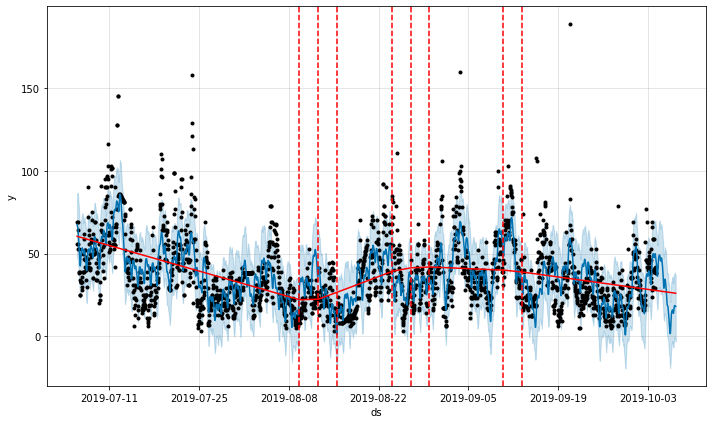

In [149]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast_alipur)
a = add_changepoints_to_plot(fig.gca(), m, forecast_alipur)

In [182]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'horiday',
  'ds': pd.to_datetime(forecast_alipur["ds"]),
  'lower_window': 0,
  'upper_window': 1,
})


In [183]:
playoffs  

,holiday,ds,lower_window,upper_window
0,horiday,2019-07-06 00:00:00,0,1
1,horiday,2019-07-06 01:00:00,0,1
2,horiday,2019-07-06 02:00:00,0,1
3,horiday,2019-07-06 03:00:00,0,1
4,horiday,2019-07-06 04:00:00,0,1
...,...,...,...,...
2236,horiday,2019-10-07 04:00:00,0,1
2237,horiday,2019-10-07 05:00:00,0,1
2238,horiday,2019-10-07 06:00:00,0,1
2239,horiday,2019-10-07 07:00:00,0,1


## 周期性

In [181]:
forecast_alipur["ds"]

0      2019-07-06 00:00:00
1      2019-07-06 01:00:00
2      2019-07-06 02:00:00
3      2019-07-06 03:00:00
4      2019-07-06 04:00:00
               ...        
2236   2019-10-07 04:00:00
2237   2019-10-07 05:00:00
2238   2019-10-07 06:00:00
2239   2019-10-07 07:00:00
2240   2019-10-07 08:00:00
Name: ds, Length: 2241, dtype: datetime64[ns]